In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv',index_col='id')
df.head()

,players,game_id,team,penalty,owngoal,minute,opponent,knockout,round
id,,,,,,,,,
1,Marcelo,1,Brazil,0,1,11,Croatia,0,Matchday 1
2,Neymar,1,Brazil,0,0,29,Croatia,0,Matchday 1
3,Neymar,1,Brazil,1,0,71,Croatia,0,Matchday 1
4,Oscar,1,Brazil,0,0,90,Croatia,0,Matchday 1
5,Oribe Peralta,2,Mexico,0,0,61,Cameroon,0,Matchday 2


In [3]:
df.replace('Bosnia-Herzegovina','Bosnia',inplace=True)

In [4]:
sns.set(style='darkgrid',font_scale=1.5)

### Goals scored by each team

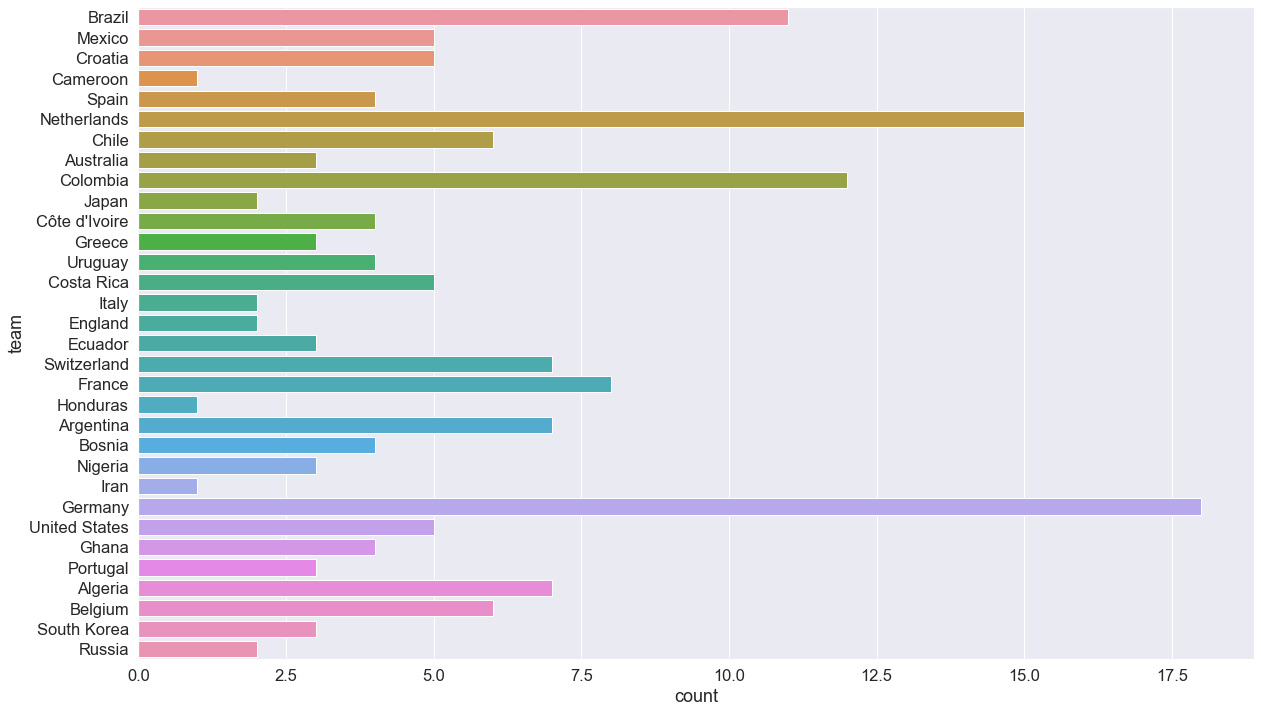

In [5]:
team_goals = df.loc[df['owngoal']==0,'team']
plt.figure(figsize=(20,12))
sns.countplot(y=team_goals)

### Owngoals

Text(0.5, 1.0, 'Team who gained through owngoal')

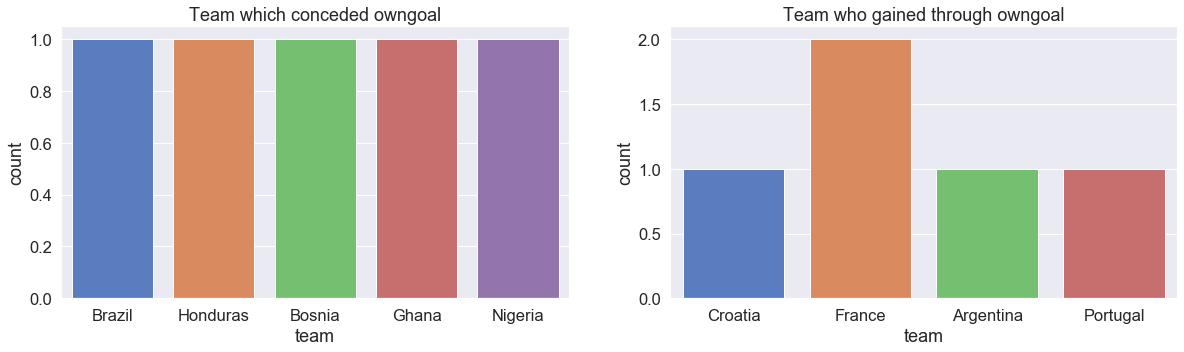

In [6]:
owngoal_team = df.loc[df['owngoal']==1,'team']
owngoal_opponent = df.loc[df['owngoal']==1,'opponent']

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.countplot(owngoal_team,ax=ax1,palette='muted')
ax1.set_title('Team which conceded owngoal')
sns.countplot(owngoal_opponent,ax=ax2,palette='muted')
ax2.set_xlabel('team')
ax2.set_title('Team who gained through owngoal')

### Goals scored by Penalties

Text(0.5, 1.0, 'Penalty Conceded')

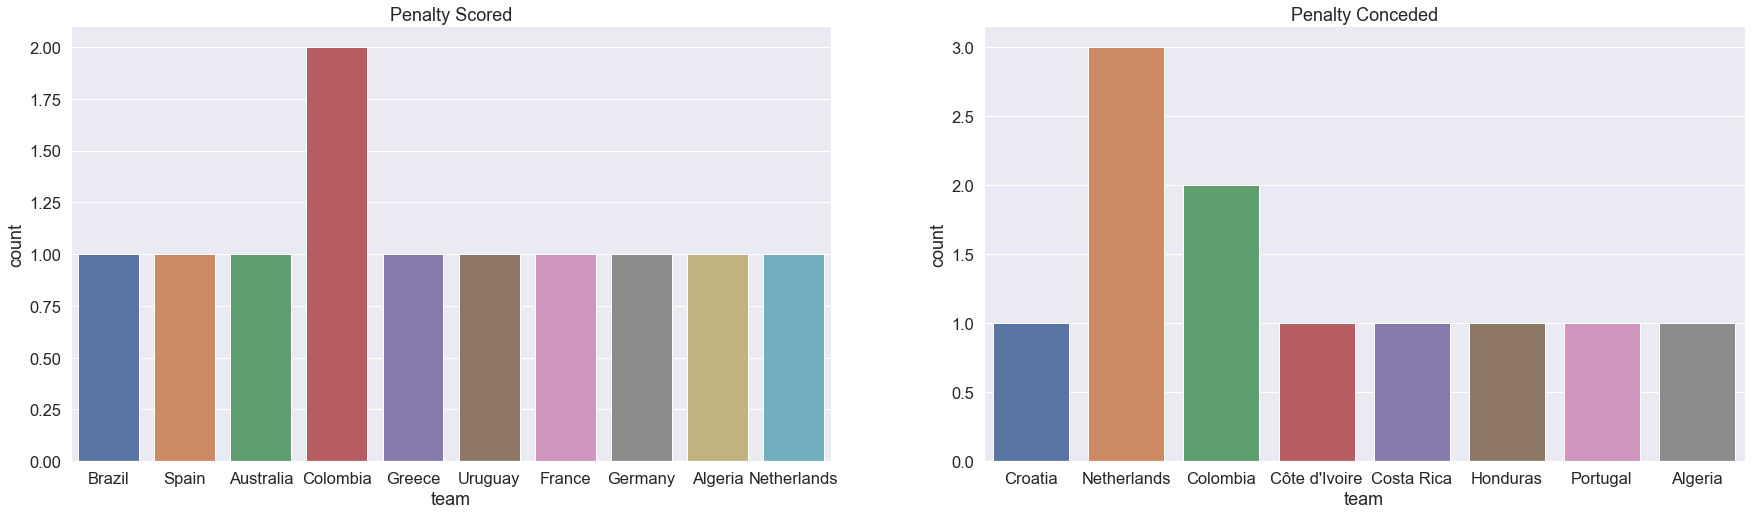

In [7]:
penalty_won = df.loc[df['penalty']==1,'team']
penalty_conceded = df.loc[df['penalty']==1,'opponent']

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(30,8))
sns.countplot(penalty_won,ax=ax1)
ax1.set_title('Penalty Scored')
sns.countplot(penalty_conceded,ax=ax2)
ax2.set_xlabel('team')
ax2.set_title('Penalty Conceded')

### Top 10 Scorers

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

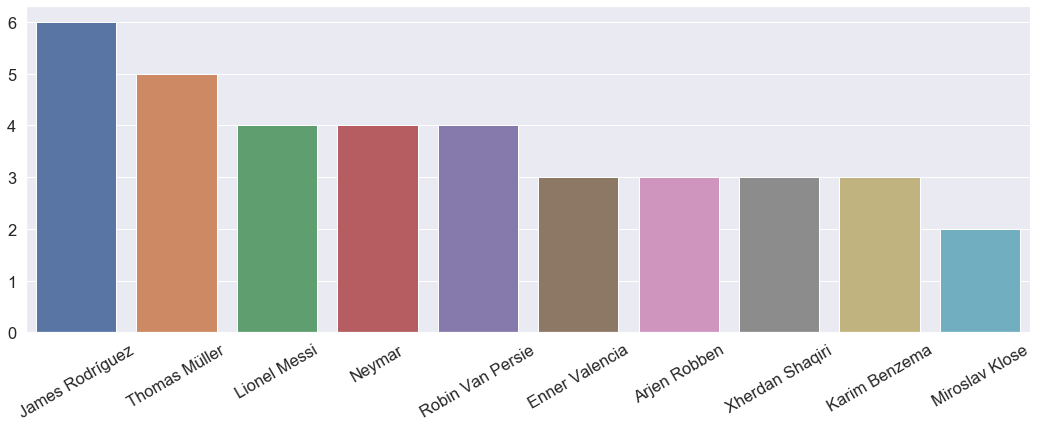

In [8]:
player = df.loc[df['owngoal']==0,'players']
player_counts = player.value_counts()[:10]

plt.figure(figsize=(18,6))
sns.barplot(x=player_counts.index,y=player_counts.values)
plt.xticks(rotation=30)

### Goal Scored Duration

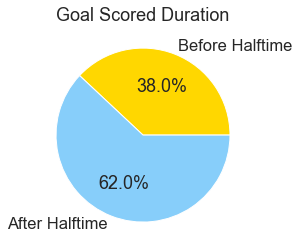

In [9]:
before_halftime = sum(df['minute']<=45)
after_halftime = sum(df['minute']>45)

plt.pie([before_halftime,after_halftime],labels=['Before Halftime','After Halftime'],autopct='%1.1f%%',colors=['gold','lightskyblue'])
plt.title('Goal Scored Duration')
plt.show()

### Goals scored on each Matchday

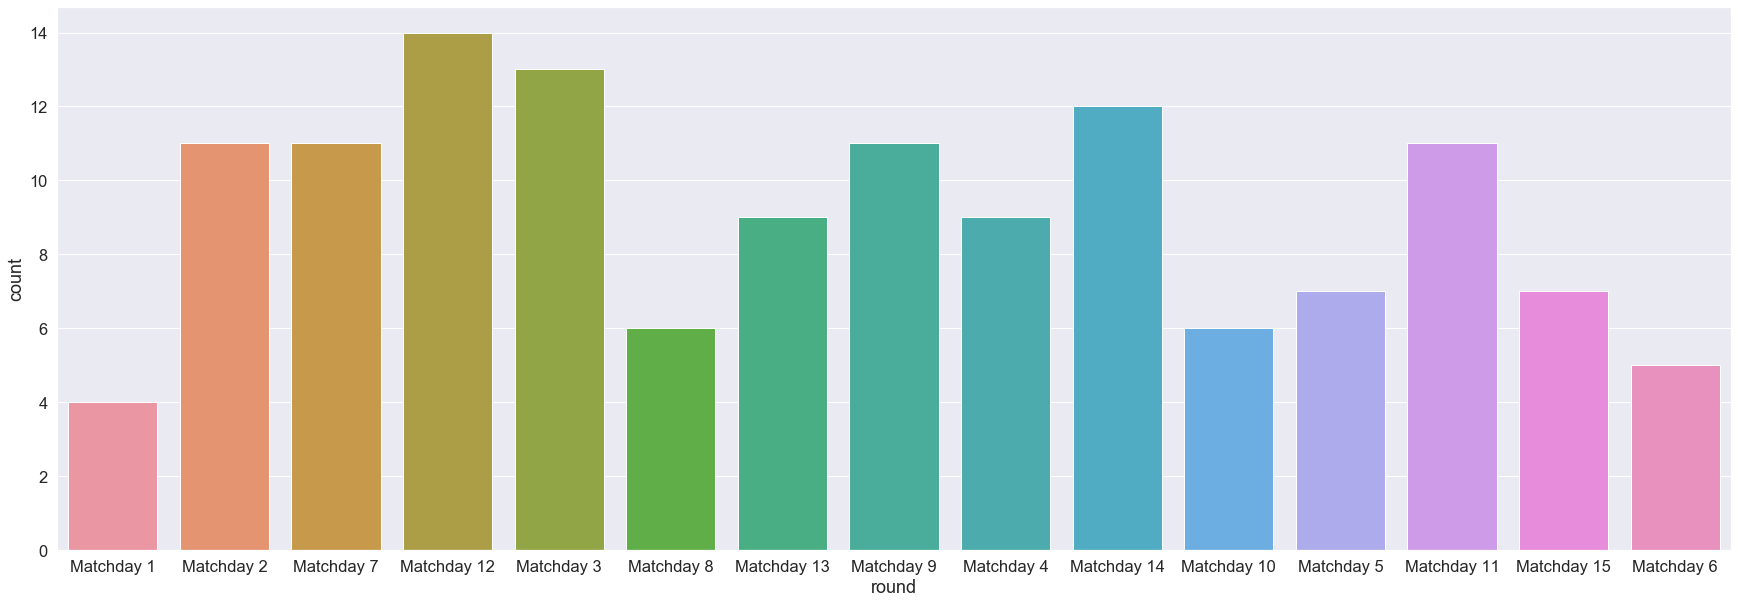

In [10]:
plt.figure(figsize=(30,10))
sns.countplot('round',data=df.loc[df['knockout']==0])

### Goals scored in Knockout Rounds

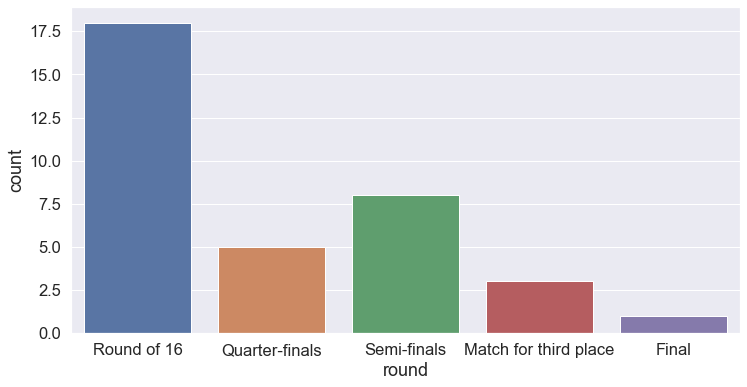

In [11]:
plt.figure(figsize=(12,6))
sns.countplot('round',data=df.loc[df['knockout']==1])

### Percentage of goals scored in Knockout Rounds

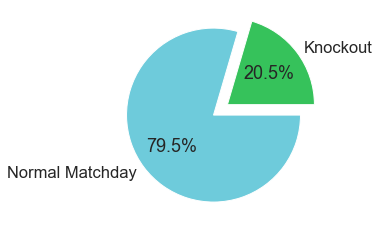

In [12]:
knockout = df['knockout'].sum()
normal = len(df) - knockout
plt.pie([knockout,normal],labels=['Knockout','Normal Matchday'],colors=['#36c25b','#6ecbdb'],autopct='%1.1f%%',explode=(0.2,0.0))
plt.show()